# Trabajo Práctico N°12 - Descenso de gradiente
Cuando resolviamos problemas de clasificación, se intentaba estimar la pertenencia de un punto $x$ a una clase $C=\{c_1,\dots,c_k\}$. Una característica esencial en los casos de regresión es que la variable de respuesta es continua. 

## Regresión Lineal y No Lineal
La regresión lineal es un modelo tal que: 

$\hat{y}(x,w)=w^Tx+w_0$

Una regresión linear puede ser transformada a una relación no lineal reemplazando $x$ por alguna función no lineal sobre las entradas $\phi(x)$:

$\hat{y}(x,w)=w^T\phi(x)+w_0$

El modelo sigue siendo lineal en los parámetros $w$, por lo que todavía se llama regresión lineal. Un ejemplo simple, es una función polinomica básica, donde el modelo tiene la siguiente forma: 

$\phi(x)=[1,x,x^2,\dots,x^d]$

La siguiente figura, ilustra el efecto de modificar $d$: incrementar los grados de $d$ nos permite crear funciones mas complejas.

![lineal_regression_d_change](img/12-lineal_regression_d_change.png)

Tambien podemos aplicar una regresion lineal a mas de una variable de entrada. Por ejemplo, si intentamos modelar la temperatura en función de la ubicación. La siguiente figura define dos modelos:

a. $F(y\mid x)=w_0+w_1x_1+w_2x_2$

b. $F(y\mid x)=w_0+w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2$

![lineal_regression_temp](img/12-lineal_regression_temp.png)
_________________________________________

## Ejemplo Practico
Como primer paso, vamos a generar un set de datos basado en la función seno y agregándole algo de ruido.

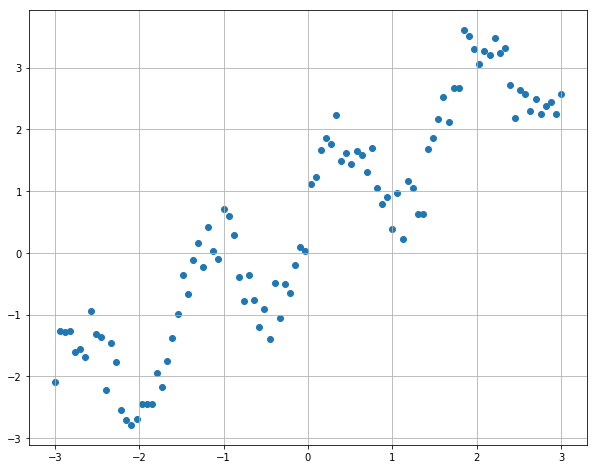

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 10, 8

x = np.linspace(-3, 3, 100)
#print(x)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.scatter(x, y);
plt.grid()
plt.show()

### Regresión Lineal 
Primero vamos a tratar a generar un modelo predictivo para los datos utilizando un modelo lineal. Por lo tanto nuestro modelo tendrá la forma: 

$\hat{Y}=\hat{\beta_0} + \sum_{\substack{j=1}}^nX_j \hat{\beta_j}$

El termino $\hat{\beta_0}$ es el punto de corte de la recta con el eje $y$, el mismo es llamado **Bias**. En el mas simple de los casos, podemos tener un solo termino dependiente ($n=1$).
La API scikit-learn requiere como variable de salida '$y$' un array uni-dimensional. En cuanto a la entrada $X$ (Se pone en mayúsculas cuando hablamos de matrices), requiere un array multidimensional, aunque sea un array [n,1]. Ambos, deben ser numpy arrays.

In [2]:
#Transformamos el vector x en un array multidimensional incorporándole una dimensión mas 
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [3]:
#Comenzamos dividiendo nuestro dataset en dos partes: training set (80%) y test set (20%):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# A continuación, usamos un algoritmo de aprendizaje implementado en LinearRegression para adaptar un modelo de regresión 
# lineal a los datos de entrenamiento (Traning Set):
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Una vez entrenado nuestro modelo, podemos obtener los coeficientes obtenidos por el entrenamiento y el valor del termino
# independiente 
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.91118387]
y-axis intercept:  0.4555704931223463


Como nuestro modelo es lineal, la relación entre la variable dependiente $y$ y la variable independiente $x$ esta definida como:
$$y = w_1 \times x + \text{bias}$$
Evaluando el punto menor y mayor de la variable dependiente en la relación podemos graficar el plot de nuestra regresión en base a nuestros datos de entrenamiento.

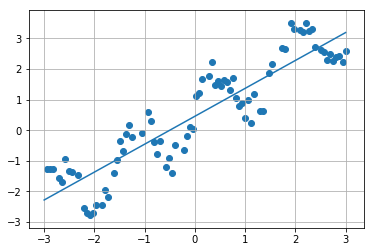

In [6]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.scatter(X_train, y_train);
plt.grid()
plt.show()

Ahora vamos a probar como se comporta nuestro modelo con los datos de test.

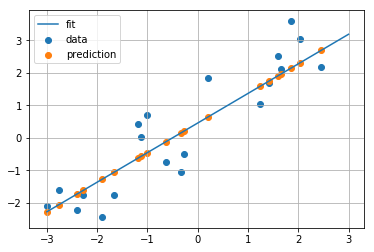

In [7]:
y_pred_test = regressor.predict(X_test)
plt.scatter(X_test, y_test, label="data")
plt.scatter(X_test, y_pred_test, label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');
plt.grid()
plt.show()

Scikit-learn provee un mecanismo para evaluar cuantitativamente la predicción utilizando el método ``score``. Para tareas de regresión. En este caso vamos a usar R<sup>2</sup> score (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score). **R2 Score** es la suma cuadratica de los resudios de la estimacion. Esto es: 
$$r2=1 - \frac{u}{v}$$
donde
$$u=\sum_{j=1}^N (y_j-\hat{y}_j)^2 \qquad \hat{y}_j = valor\;estimado $$
y
$$v=\sum_{j=1}^N (y_j-\bar{y})^2 \qquad \bar{y} = media\;valores\;reales $$
Donde $r2=1$ representa un modelo que se ajusta de manera perfecta a los datos.

In [8]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_pred_test))

0.8221820076665118


_____________________________________________
## Función de costo
En el ejemplo anterior, se realizo una búsqueda de coeficientes tales que minimicen el error promedio sobre los datos conocidos. Esto se puede expresar a través de una función que es llamada **Función de costo**.

$\ell(w)\triangleq\sum_{i=1}^N log\;[y_i - \hat{f}(x_i, w)]^2$

Si en vez de maximizar la función de costo, intentamos minimizar la misma, la podemos expresar como la función negativa de costo:

$\ell(w)\triangleq-\sum_{i=1}^N log\;p(y_i\mid x_i, w)$

Si expresamos la definición previa en forma de multiplicación de matrices

$\ell(w)\triangleq \frac{1}{2}(y-Xw)^T(y-Xw)$

Y finalmente, el gradiente de la función de costo, expresado matricialmente es:

$\nabla\ell(w)=X^TXw-X^Ty$

__________________________________________

## Gradient Descent
Para optimizar modelos predictivos, tanto para clasificación, como así también para regresión. Uno de los métodos mas difundidos es **Descenso de Gradiente (Gradient Descent)**.

El descenso de gradiente es un algoritmo de optimización iterativa de primer orden para encontrar un mínimo local de una función. Para realizar esto, se dan pasos proporcionales al negativo del gradiente (o gradiente aproximado) de la función en el punto actual. Si, en cambio, uno toma pasos proporcionales al positivo del gradiente, uno se aproxima a un máximo local de esa función; este ultimo procedimiento se conoce como ascenso de gradiente.

El método de descenso de gradiente esta basado en la observación de una función $F(x)$ multi-variable que sea definida y diferenciable en la cercanía de un punto $a$. Evaluando el grandiente en el punto $a_n$ se puede estimar un nuevo valor $a_{n+1}$ donde se minimize $F(x)$. Esto es:
$$a_{n+1}=a_n - \eta\nabla F(a_n)$$
para un $\eta$ suficientemente pequeño, se puede asegurar que $F(a_n)\geq F(a_{n+1})$.

Entonces, asumiendo un mínimo local inicial $a_0$ de $F(x)$, podemos ir descendiendo iterativamente a través de los distintos $a_0,a_1,a_2,\dots$ donde $F(a_0)\geq F(a_1)\geq F(a_2)\geq\dots$ hasta encontrar un $x_n\mid n\geq 0$ que converge al mínimo local deseado.

![gradient_descent](img/12-gradient_descent.gif)

Un elemento clave en este método es determinar un correcto valor de $\eta$. Si el valor de $\eta$ es muy pequeño, el método va a requerir muchas iteraciones para converger, puede quedar atrapado en mínimos locales y nunca alcanzar un mínimo global. Al contrario, si el $\eta$ es muy grande, el método puede sufrir oscilaciones permanentes y diverger.

Otro punto muy importante, es determinar un buen punto inicial $a_0$ para el método. Dependiendo del punto inicial elegido, el método puede converger a resultados muy distintos.

![gd_multiple_local_minimum](img/12-gd_multiple_local_minimum.jpg)

## Ejercicio: 
1) Implementar Gradient Descent y entrenar un estimador para el problema previo utilizando como función de costo:
$$\ell(w)\triangleq \frac{1}{2}w^T(X^TX)w-w^T(X^Ty)$$

In [9]:
def lr_loss(X, Y, W):
    # X: matriz de muestras de entrenamiento
    # Y: etiquetas
    # W: vector de coeficientes. Incluye el término de "bias" como última componente
    n_samples, n_dim = X.shape
    assert len(Y) == n_samples
    
    w, w0 = W[:n_dim], W[-1]
    loss = 0
    
    # TODO: implementar función de costo
    
    return loss

def lr_grad(X, Y, W):
    # X: matriz de muestras de entrenamiento
    # Y: etiquetas
    # w: vector de coeficientes. Incluye el término de "bias" como última componente
    n_samples, n_dim = X.shape
    assert len(Y) == n_samples   
         
    # TODO: implementar el cómputo del gradiente.
    #   Retornar como un arreglo unidimensional de dimensión n_dim+1, en donde 
    #   la última componente contiene el gradiente respecto del término de bias    
       
    return gW

def train_linear_predictor(X, Y, loss_fn, grad_fn, eta=0.1, max_iter=100, tol=0.001, debug=False):    
    # X: matriz de muestras de entrenamiento
    # Y: etiquetas
    # loss_fn: función de costo. Tiene que tomar como argumentos X, Y y W, con W los parámetros del modelo
    # grad_fn: función que computa (y evalúa en X,Y,W) el gradiente de la 
    #   función de costo respecto de los parámetros del modelo
    # lambda_: parámetro de regularización (weight decay)
    # eta: tasa de aprendizaje
    # max_iter: número máximo de iteraciones de decenso de gradiente
    # tol: criterio de parada por no evolución en la función de costo
    n_samples, n_dim = X.shape
    
    # Initialization "Xavier". Vector de dimensionalidad n_dim +1 porque
    # inicluye el término de bias. Este último se inicializa a cero
    W = np.random.normal(scale=np.sqrt(2./n_dim), size=n_dim+1)
    W[-1] = 0.     
        
    prev_loss, loss = np.inf, loss_fn(X, Y, W)
    
    # descenso de gradiente
    for t in range(max_iter):
        
        # gradiente en (X,Y,W)
        gW = grad_fn(X, Y, W)                
        
        # actualización de parámetros
        #  W[:n_dim] corresponden a los coeficientes del término lineal
        #  W[-1] corresponde al término de bias
        # W[:n_dim] = ...
        # W[-1] = ...
    
        prev_loss = loss
        loss = loss_fn(X, Y, W)
        
        if (prev_loss - loss) / np.abs((prev_loss + 2**-23)) < tol:
            if debug:
                print('done')
            break
        if debug:    
            print('t={}, loss={:.3e}'.format(t, loss))

    return W, loss, t

W, loss_train, _ = train_linear_predictor(X_train, y_train, lr_loss, lr_grad, max_iter=30, tol=1e-4, debug=True)

NameError: name 'gW' is not defined

In [ ]:
n_samples, n_dim = X_test.shape

y_pred_test = X_test.dot(W[:n_dim])+W[-1]
plt.scatter(X_test, y_test, label="data")
plt.scatter(X_test, y_pred_test, label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');
plt.grid()
plt.show()

## Cross-Validation (Validación Cruzada)
En los ejemplos previos, dividimos nuestro conjunto de datos en dos partes, un conjunto de entrenamiento (traning set) y un conjunto de prueba (test set). Utilizamos el conjunto de entrenamiento para ajustar nuestro modelo y el conjunto de prueba para evaluar el poder de generalización del mismo (Que tan bien predice datos nunca vistos).

![train_test_split](img/11-train_test_split.png)

Todo el tuneo de nuestro modelo predictivo se debería realizar utilizando los datos de entrenamiento. Sin utilizar los datos de test para nada. Si nuestros modelos predictivos tienen hiper-parámetros para tunear, necesitaríamos volver a sub-dividir nuestro conjunto de entrenamiento para poder validar que conjunto de hiper-parámetros es mejor.

![cross_validation_and_hyperparams](img/12-cross_validation_and_hyperparams.jpeg)

Esta técnica se llama **Validación Cruzada**, de se divide en k (normalmente $5<=k<=10$) conjuntos y por cada iteración, uno de los conjuntos "k" es usado como conjunto de prueba. De esta forma, alternando el fold que es de validación, podemos evitar el sesgo en los datos de entrenamiento para realizar el tuneo de los hiper-parámetros de nuestro modelo predictivo. 

![cross_validation](img/12-cross_validation.png)

Scikit-learn también tiene una herramienta para realizar esto. Por lo tanto, vamos a tomar el mismo ejemplo que en el caso anterior y vamos a utilizar cross-validation.

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X_train, y_train)
    
print(kf)  


for train_index, val_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", val_index)
   X_train, X_val = X[train_index], X[val_index]
   y_train, y_val = y[train_index], y[val_index]

## Ejercicio: 
2) Utilizar **validación cruzada** (con $k=5$) para determinar el mejor valor del parametro $\eta$ (eta) de **descenso de gradiente**. El mejor valor de $\eta$ es aquel que mejor score (R2 score) genera al final del proceso de entrenamiento, al aplicar **descenso de gradiente** para buscar los parametros $w$ del modelo predictivo. 

A tener en cuenta:
 1. Los valores de $\eta$ tienen que ser obtenidos de forma aleatoria del intervalo $[0.001 \leq \eta \leq 0.1]$. Evaluar almenos **10 valores distintos**. 
 2. Calcular el R2 Score de cada valor de $\eta$ utilizado 
 3. Seleccionar el mejor $\eta$ y volver a entrenar un nuevo predictor utilizando todo el conjunto de entrenamiento (si dividirlo en folds).
 4. Evaluar el R2 Score del modelo final.

3) Aplicar el mismo procedimiento para el siguiente dataset 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
#print(x)
rng = np.random.RandomState(42)
z = np.sin(4 * x) + x + 3*rng.uniform(size=len(x)) + y**2
ax.scatter(x, y, z);
